In [1]:
# Load modules
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib as mpl
from pathlib import Path
import matplotlib.dates as mdates
import psyplot.project as psy
import six
data_dir = Path(Path.cwd().parent,'example_datasets')
sys.path.insert(1,str(data_dir))
from get_data import *

In [ ]:
# Read in nc file and a file containing the corresponding grid information

# Function for encoding
def add_encoding(obj):
    obj.encoding['coordinates'] = 'clat clon'

grid_ds = psy.open_dataset('../example_datasets/ICON-1E_DOM01.nc')
icon_ds = psy.open_dataset('../example_datasets/lfff01000000.nc').squeeze()
data = icon_ds.rename({"ncells":"cell"}).merge(grid_ds)
for k, v in six.iteritems(data.data_vars):
    add_encoding(v) 

In [2]:
# Read in nc file that contains grid information

input_file = '../example_datasets/my_exp1_atm_3d_ml_20180921T000000Z.nc'
data = psy.open_dataset(input_file)

In [3]:
# Check which variables are available
for var in data.variables:
    print(var)

clon
clon_bnds
clat
clat_bnds
elon
elon_bnds
elat
elat_bnds
height
height_bnds
height_2
height_3
depth
depth_2
depth_2_bnds
depth_3
depth_3_bnds
height_4
depth_4
depth_4_bnds
time
u
v
vt
qc
qi
qr
qs
qv
rho
theta_v
tke
vn
w
ddt_vn_phy
ddt_exner_phy
ddt_temp_dyn
exner_pr
exner_dyn_incr
pres_sfc
ddt_pres_sfc
temp
tempv
temp_ifc
pres
pres_ifc
dpres_mc
omega
div
div_ic
hdef_ic
dwdx
dwdy
vor
mass_fl_e
rho_ic
w_concorr_c
theta_v_ic
vn_ie
tqv
tqc
tqi
tqr
tqs
rain_gsp_rate
rain_gsp
tot_prec
cape
cape_ml
cin_ml
gust10
dyn_gust
clct_mod
cldepth
tot_qv_dia
tot_qc_dia
tot_qi_dia
tqv_dia
tqc_dia
tqi_dia
avg_qv
avg_qc
avg_qi
tsfctrad
thbclr_s
thb_t
thb_s
thu_s
lwflxall
t_s
t_sk
t_so
runoff_s
lwflx_up
lwflx_dn
lwflx_up_clr
lwflx_dn_clr
shfl_s
lhfl_s
lhfl_bs
lhfl_pl
qhfl_s
qcfl_s
t_2m
qv_2m
rh_2m
td_2m
u_10m
v_10m
sp_10m
umfl_s
vmfl_s
str_u_sso
str_v_sso
drag_u_grid
ddt_temp_radlw
ddt_temp_turb
ddt_temp_drag
ddt_temp_pconv
ddt_u_turb
ddt_u_sso
ddt_u_pconv
ddt_v_turb
ddt_v_sso
ddt_qv_turb
ddt_qc_turb
dd

In [4]:
# Load data
var_name = 'u'
var_field = getattr(data,var_name)
values = var_field.values
if 'height' in var_field.dims[1]: 
        height = 0 # specify height index
        var = values[:,height,:]
else:
    var = values
time = data.time.values[:]

In [5]:
# Get mean over whole map
var_mean = var.mean(axis=1)

In [6]:
# Get values of grid cell closest to coordinate
# E.g. Zürich:
lon = 8.54
lat = 47.38
def ind_from_latlon(lats, lons, lat, lon, verbose=False):                                                                    
    """Find the nearest neighbouring index to given location.                                                                
    Args:                                                                                                                    
        lats (2d array):            Latitude grid                                                                            
        lons (2d array):            Longitude grid                                                                           
        lat (float):                Latitude of location                                                                     
        lon (float):                Longitude of location                                                                    
        verbose (bool, optional):   Print information. Defaults to False.                                                    
    Returns:                                                                                                                 
        int     Index of nearest grid point.                                                                                 
    """                                                                                                                      
    dist = [                                                                                                                 
        np.sqrt((lats[i] - lat) ** 2 + (lons[i] - lon) ** 2) for i in range(len(lats))                                       
    ]                                                                                                                        
    ind = np.where(dist == np.min(dist))[0][0]                                                                               
    if verbose:                                                                                                              
        print(f"Closest ind: {ind}")                                                                                         
        print(f" Given lat: {lat:.3f} vs found lat: {lats[ind]:.3f}")                                                        
        print(f" Given lon: {lon:.3f} vs found lon: {lons[ind]:.3f}")                                                        
    return ind 

lats = np.rad2deg(data.clat.values[:])
lons = np.rad2deg(data.clon.values[:])
ind = ind_from_latlon(lats,lons,lat,lon,verbose=True)
var_coord = var[:,ind]

Closest ind: 3352
 Given lat: 47.380 vs found lat: 47.372
 Given lon: 8.540 vs found lon: 8.527


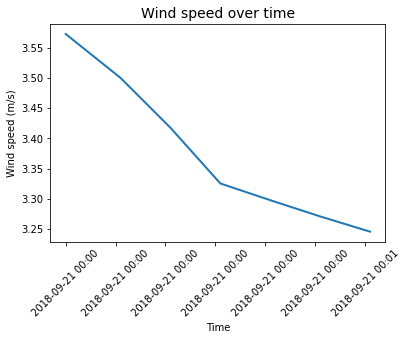

In [7]:
# plot mean over map                                                                                                                
f, ax = plt.subplots(1,1)                                                                                                       
h = ax.plot(time, var_mean, lw=2)
ax.set_ylabel('Wind speed (m/s)')
ax.set_xlabel('Time') 
ax.set_title('Wind speed over time', fontsize=14) 
#plt.ylim(3,4)
# Set date format
date_format = '%Y-%m-%d %H:%M'
myFmt = mdates.DateFormatter(date_format)                                                                                        
ax.xaxis.set_major_formatter(myFmt)
# Rotate ticks
plt.xticks(rotation=45);

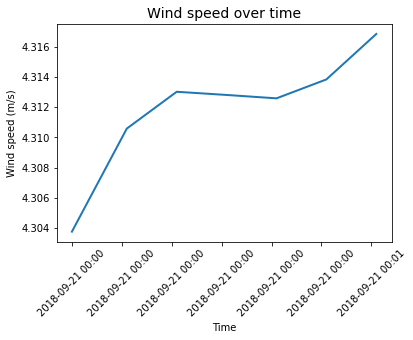

In [8]:
# plot at coordinate                                                                                                               
f, ax = plt.subplots(1,1)                                                                                                      
h = ax.plot(time, var_coord, lw=2)
ax.set_ylabel('Wind speed (m/s)')
ax.set_xlabel('Time') 
ax.set_title('Wind speed over time', fontsize=14) 
#plt.ylim(3,4)
# Set date format
date_format = '%Y-%m-%d %H:%M'
myFmt = mdates.DateFormatter(date_format)                                                                                        
ax.xaxis.set_major_formatter(myFmt)
# Rotate ticks
plt.xticks(rotation=45);